In [1]:
# John Carther V. Lao

Importing Libraries, modules, and other dependencies

In [2]:
!pip install gym_super_mario_bros==7.3.0 nes_py
!pip install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio===0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html
!pip install stable-baselines3[extra]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html
tcmalloc: large alloc 1821458432 bytes == 0x35f2000 @  0x7fc7e8a431e7 0x4b2590 0x5ad01c 0x5dcfef 0x58f92b 0x590c33 0x5e48ac 0x4d20fa 0x51041f 0x58fd37 0x50ca37 0x58fd37 0x50ca37 0x5b575e 0x4bad0a 0x4d3249 0x591e56 0x50e18c 0x5b4ee6 0x4bad0a 0x4d3249 0x591e56 0x50e18c 0x5b4ee6 0x4bad0a 0x4d3249 0x591e56 0x50e18c 0x5b575e 0x4bad0a 0x4d3249
tcmalloc: large alloc 1821458432 bytes == 0x6ff06000 @  0x7fc7e8a431e7 0x4b2590 0x5ad01c 0x64b047 0x4d22a6 0x51041f 0x58fd37 0x50ca37 0x58fd37 0x50ca37 0x5b575e 0x4bad0a 0x4d3249 0x591e56 0x50e18c 0x5b4ee6 0x4bad0a 0x4d3249 0x591e56 0x50e18c 0x5b4ee6 0x4bad0a 0x4d3249 0x591e56 0x50e18c 0x5b575e 0x4bad0a 0x4d3249 0x591e56 0x50e18c 0x5b4ee6
tcmalloc: large alloc 1821458432 bytes == 0xdc

In [3]:
# Import the game
import gym_super_mario_bros
# Import the Joypad wrapper
from nes_py.wrappers import JoypadSpace
# Import the SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt

# Import os for file path management
import os 
# Import PPO for algos
from stable_baselines3 import PPO
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

Data Preprocessing

In [4]:
# Setup game
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [5]:
# Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# Simplify the controls 
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])
# Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

In [6]:
state = env.reset()

In [11]:
state, reward, done, info = env.step([5])

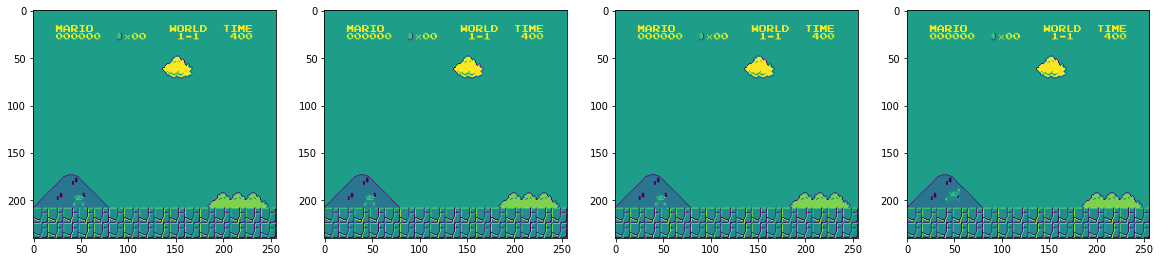

In [12]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

Model Creation

In [13]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [14]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [16]:
# Setup model saving callback
callback = TrainAndLoggingCallback(check_freq=1000, save_path=CHECKPOINT_DIR)

Model Training

In [17]:
# This is the AI model started
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, 
            n_steps=512) 

Using cpu device
Wrapping the env in a VecTransposeImage.


In [18]:
# Train the AI model, this is where the AI model starts to learn
model.learn(total_timesteps=1000, callback=callback)

Logging to ./logs/PPO_3


/usr/local/lib/python3.7/dist-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


----------------------------
| time/              |     |
|    fps             | 27  |
|    iterations      | 1   |
|    time_elapsed    | 18  |
|    total_timesteps | 512 |
----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 2            |
|    time_elapsed         | 139          |
|    total_timesteps      | 1024         |
| train/                  |              |
|    approx_kl            | 2.167595e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.95        |
|    explained_variance   | -0.00102     |
|    learning_rate        | 1e-06        |
|    loss                 | 175          |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.000257    |
|    value_loss           | 476          |
------------------------------------------


In [19]:
model.save('LAO_PPO_MODEL_5')

TEST MODEL

In the 1,000,000 timesteps notebook version, the next cell does not run as Google colab runs virtually. Work arounds are available, so i re-run the code in at 1,000 timsteps for testing purposes. (**I have a pinned version of the 1,000,000 run :) **)- Lao 

In [20]:
# Load model
model = PPO.load('./drive/MyDrive/Colab_Notebooks/Reinforcement/best_model_1000000.zip')

In [21]:
state = env.reset()

In [22]:
from gym import wrappers

env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = wrappers.Monitor(env, "./gym-results", force=True)
env.reset()
for _ in range(4000):
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done: break
env.close()

/usr/local/lib/python3.7/dist-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


In [23]:
import io
import base64
from IPython.display import HTML

video = io.open('./gym-results/openaigym.video.%s.video000000.mp4' % env.file_infix, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''
    <video width="360" height="auto" alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''
.format(encoded.decode('ascii')))

----------------------Discussion----------------------\
Model Creation:\
Using Stable-Baselines3, specifically the PPO Model. For this is a set of reliable implementations of reinforcement learning algorithms in PyTorch.\
The Proximal Policy Optimization algorithm used here utilizes some ideas from A2C of having multiple 'workers' and TRPO of using trust region to help the actor.

Model Training:\
The model is trained with trainsteps of 1,000,000 with a step every 512. Also, a callback is utilized to save a model every 10,000 iteration. So a comparison of model progression can be made.

Total Training Time: ~4 Hours

References: \

https://github.com/openai/gym/issues/2560   \
https://github.com/nicknochnack/MarioRL \
https://pypi.org/project/gym-super-mario-bros/ \
https://pypi.org/project/nes-py/ \